In [1]:
import pandas as pd

from aggme.aggregation import BboxAggregation
from aggme.utils import AnnotationData, Visualizer
from aggme.utils.processing import toloka_bboxes_to_template

# Loading data

In [2]:
data = AnnotationData(markup_type='bboxes')

In [3]:
df = pd.read_csv("./input_files/bboxes_data.csv")
df.head(3)

,OUTPUT:markup,ASSIGNMENT:assignment_id,INPUT:image
0,"[{'shape': 'rectangle', 'left': 0.37594, 'top'...",user_1,case_000_ov3_cl1
1,"[{'shape': 'rectangle', 'left': 0.38454, 'top'...",user_2,case_000_ov3_cl1
2,"[{'shape': 'rectangle', 'left': 0.39009, 'top'...",user_3,case_000_ov3_cl1


# Check and visualize the data

In [4]:
data.load_markups(df, toloka_bboxes_to_template)
group = data.groups[1]
group

MarkupGroup object
name: case_000_ov3_cl2
data_len: 6
annotators_len: 3

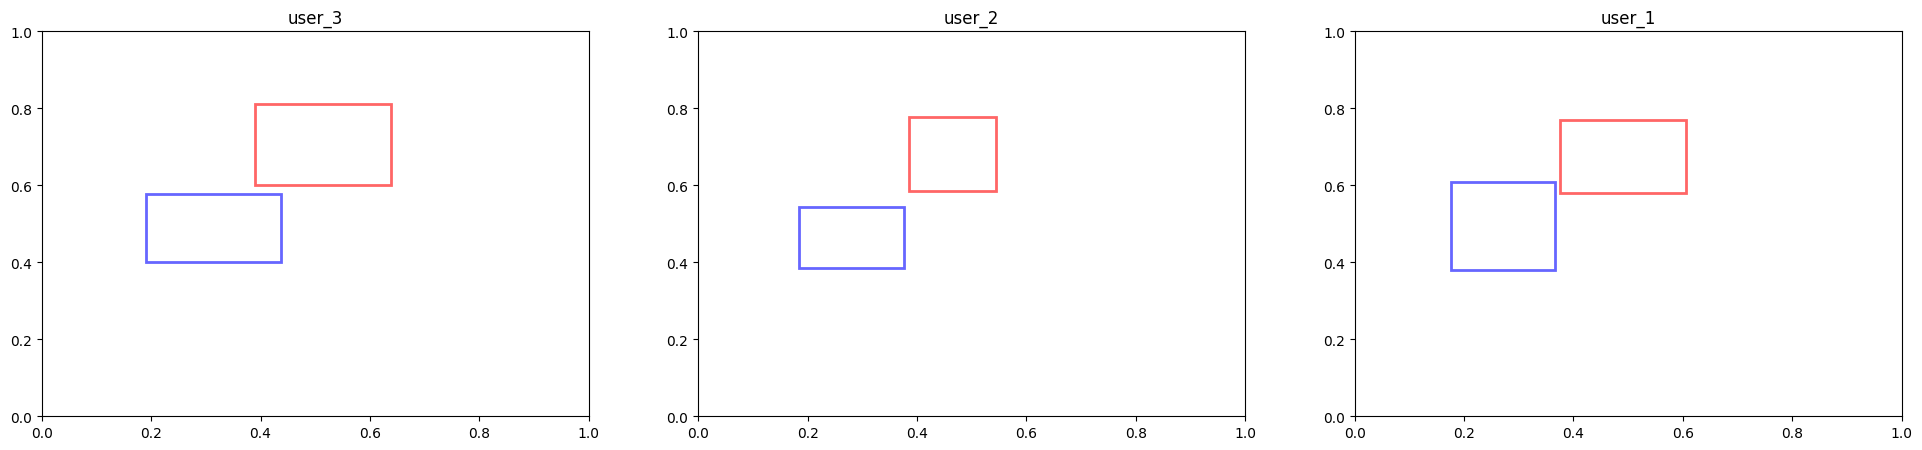

In [5]:
vis_group = Visualizer(group)
vis_group.draw(group)

# Aggregate

In [6]:
aggregator = BboxAggregation()

Total results of aggregation:
- Every failed step sends markup group to next method in this order `['hard', 'drop', 'soft']`,
- To make drop logic work, you shold have more than 3 markups on image and possibly a lower threshold/confidence value,
- Every markup, that failed all the methods goes to `['fail']`.

In [7]:
data.load_markups(df, toloka_bboxes_to_template)
results = aggregator.get_aggregation_results(data, threshold=0.5, confidence=0.6)

100%|██████████| 28/28 [00:02<00:00, 11.09it/s]


In [8]:
results.keys()

dict_keys(['hard', 'drop', 'soft', 'fail'])

In [9]:
len(results['hard']), len(results['drop']), len(results['soft']), len(results['fail'])

(12, 4, 7, 5)

In [10]:
results

{'hard': [(MarkupGroup object
   name: case_000_ov3_cl1
   data_len: 3
   annotators_len: 3,
   MarkupGroup object
   name: case_000_ov3_cl1
   data_len: 1
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3'},
   set()),
  (MarkupGroup object
   name: case_000_ov3_cl2
   data_len: 6
   annotators_len: 3,
   MarkupGroup object
   name: case_000_ov3_cl2
   data_len: 2
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3'},
   set()),
  (MarkupGroup object
   name: case_003_ov4_cl1_rm_box
   data_len: 3
   annotators_len: 3,
   MarkupGroup object
   name: case_003_ov4_cl1_rm_box
   data_len: 1
   annotators_len: 1,
   {'user_1', 'user_2', 'user_4'},
   set()),
  (MarkupGroup object
   name: case_004_ov3_cl1_mix
   data_len: 3
   annotators_len: 3,
   MarkupGroup object
   name: case_004_ov3_cl1_mix
   data_len: 1
   annotators_len: 1,
   {'user_1', 'user_2', 'user_3'},
   set()),
  (MarkupGroup object
   name: case_004_ov3_cl2_mix
   data_len: 6
   annotators_len: 3,
   MarkupGroup ob

# Visualise results

<font color='green'> Green </font> color at the top of image shows that annotators are __correct__. <font color="red">Red</font> color will be showing otherwise.

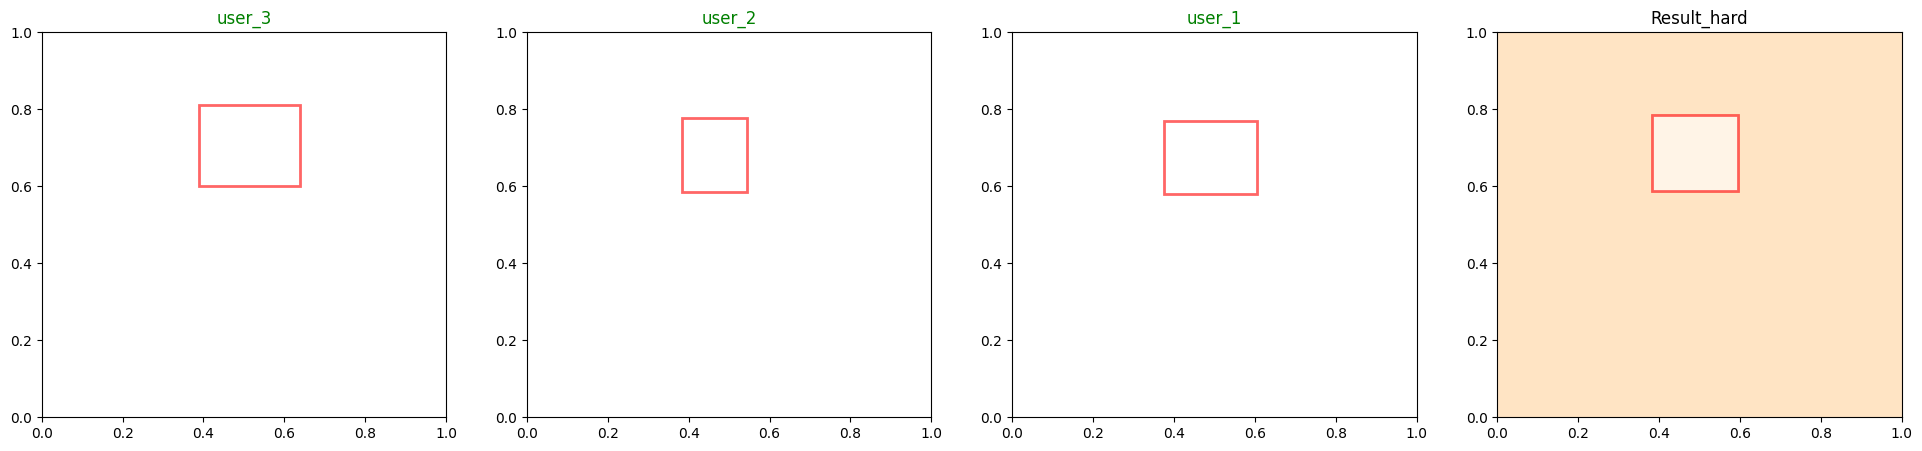

In [11]:
#  Example 0.1
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: GOOD

method, group = aggregator.get_group_by_name(results, 'case_000_ov3_cl1')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

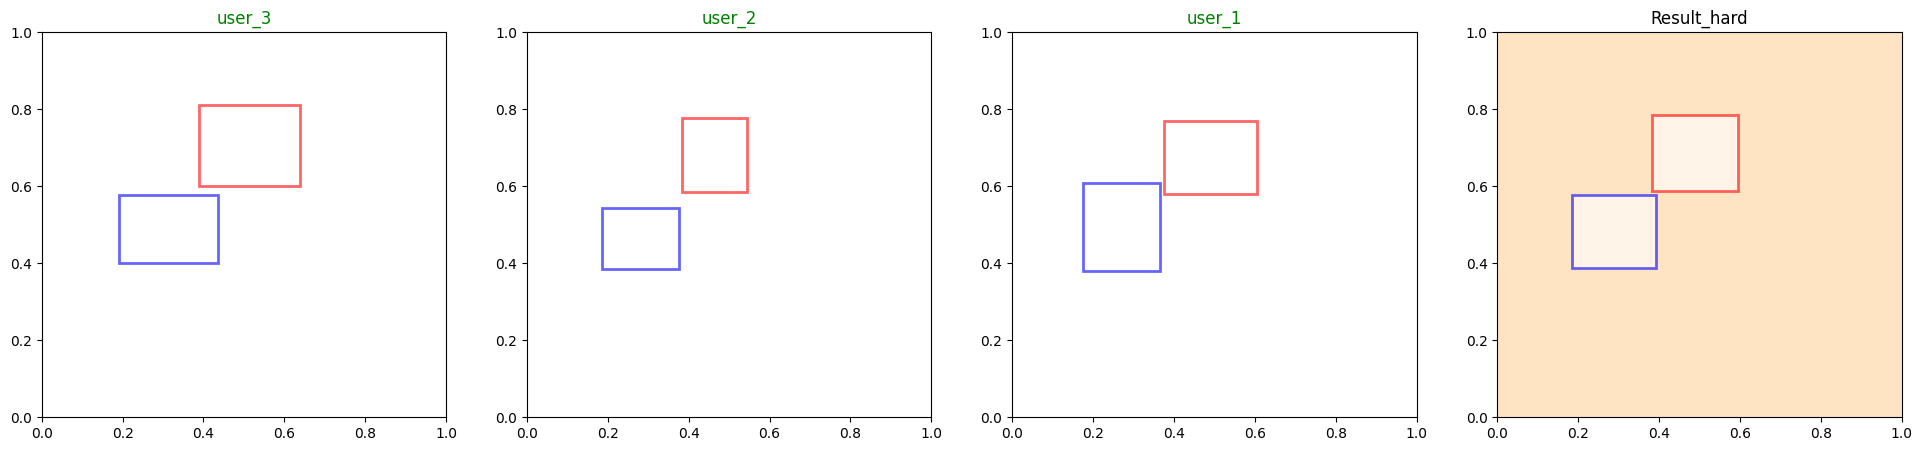

In [12]:
#  Example 0.2
#    Overlap: 3
#    Number of classes: 2
#    Method: HARD
#    Result: GOOD

method, group = aggregator.get_group_by_name(results, 'case_000_ov3_cl2')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

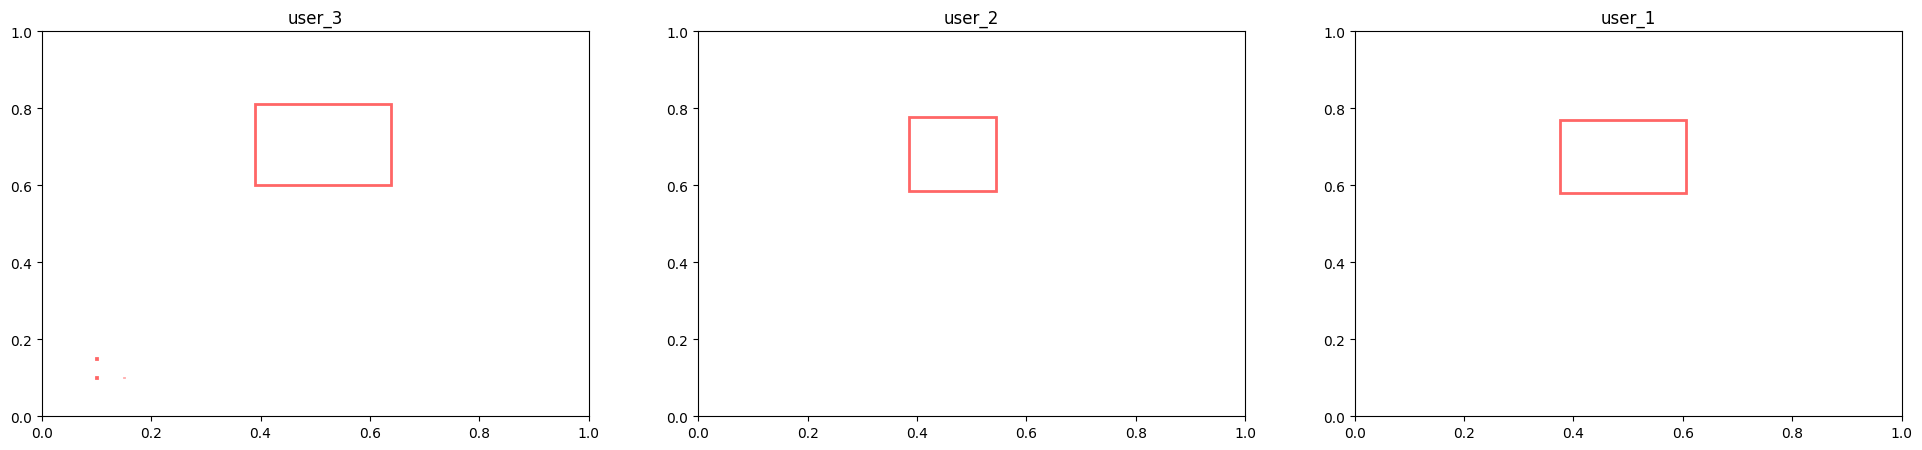

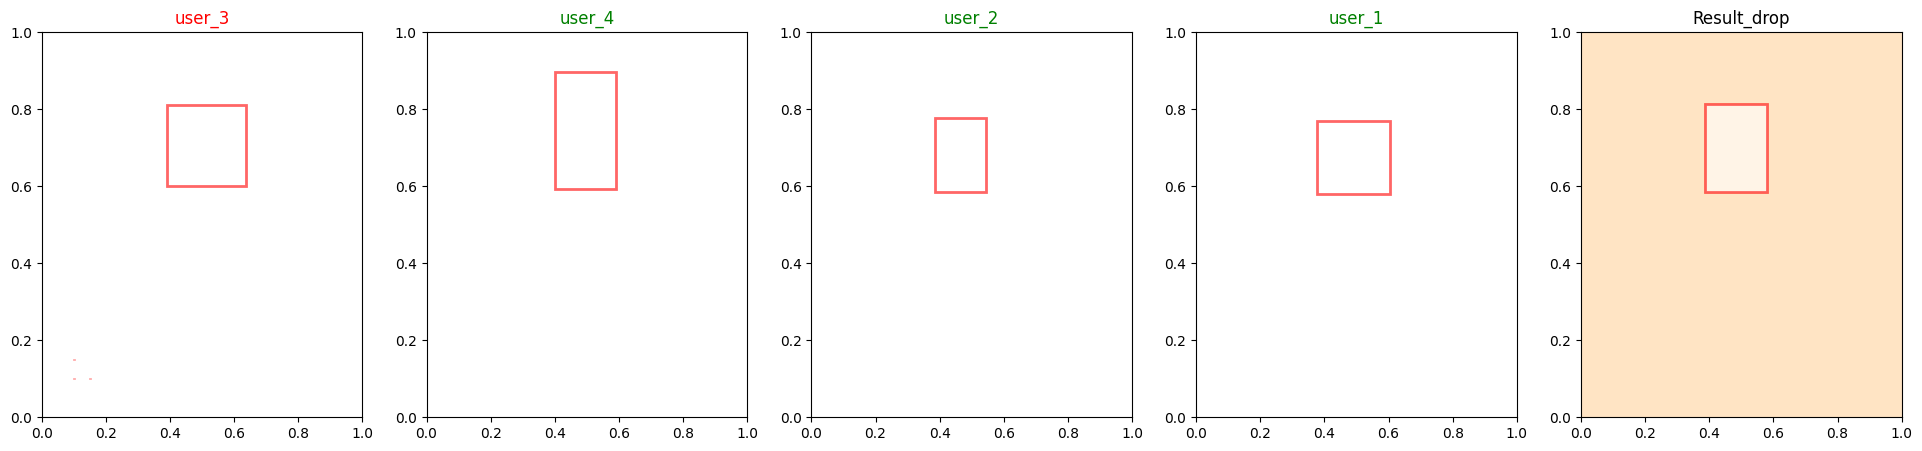

In [13]:
#  Example 1.1
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: BAD
#
#  We had 3 markups on image, but user_3 added small boxes and the hard-method do not work.
#  We requested additional markup and hard-method worked after dropping one error markup.

method, group = aggregator.get_group_by_name(results, 'case_001_ov3_cl1_add_small_boxes')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_001_ov4_cl1_add_small_boxes')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

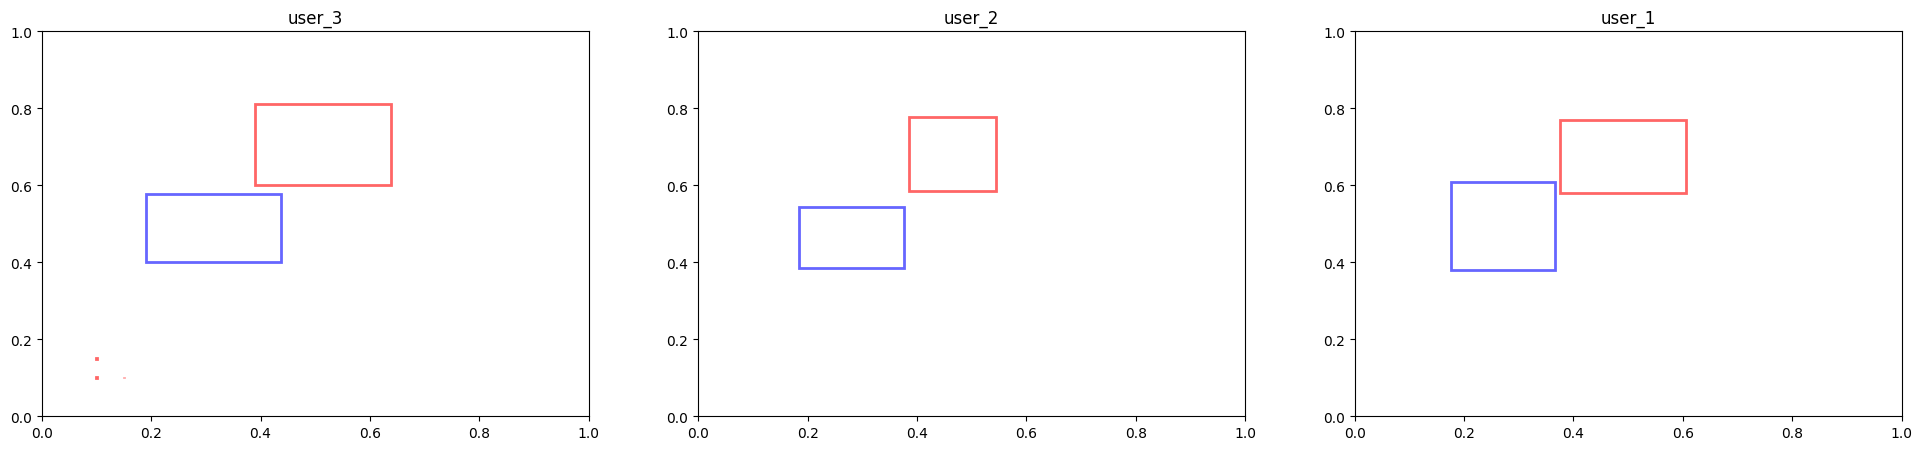

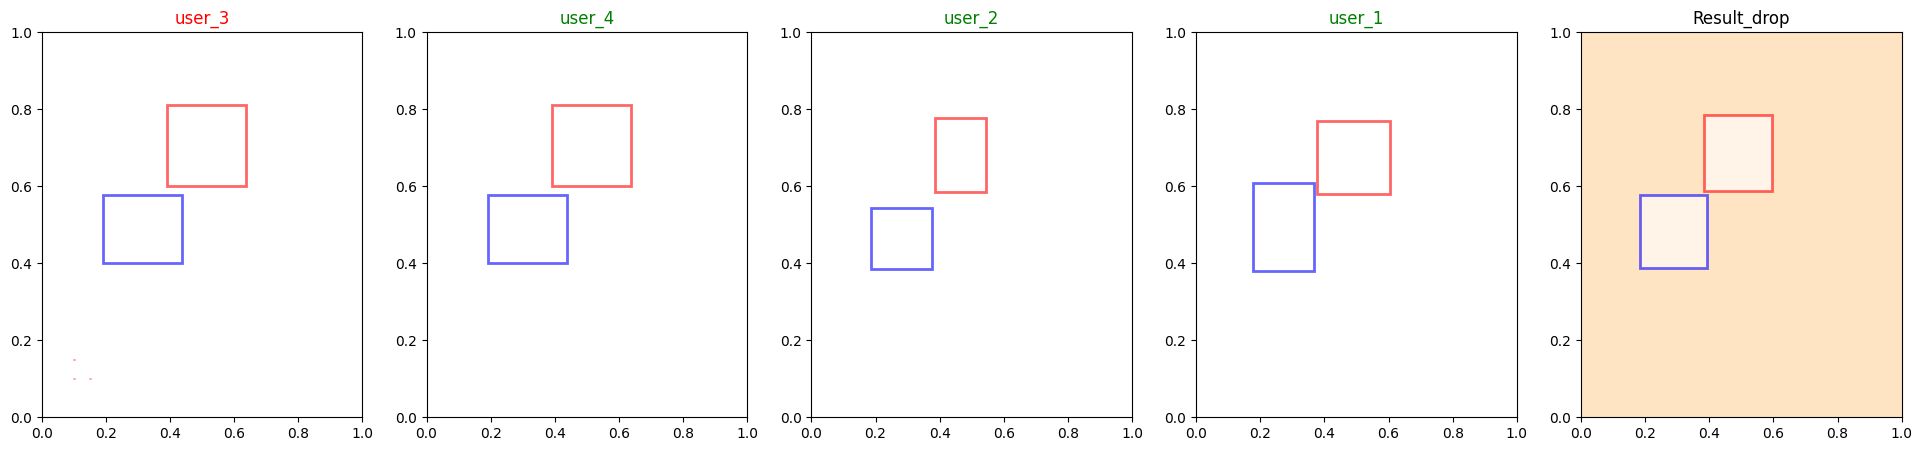

In [14]:
#  Example 1.2
#    Overlap: 3
#    Number of classes: 2
#    Method: HARD
#    Result: BAD
#
#  We had 3 markups on image, but user_3 added small boxes and the hard-method do not work.
#  We requested additional markup and hard-method worked after dropping one error markup.

method, group = aggregator.get_group_by_name(results, 'case_001_ov3_cl2_add_small_boxes')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_001_ov4_cl2_add_small_boxes')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

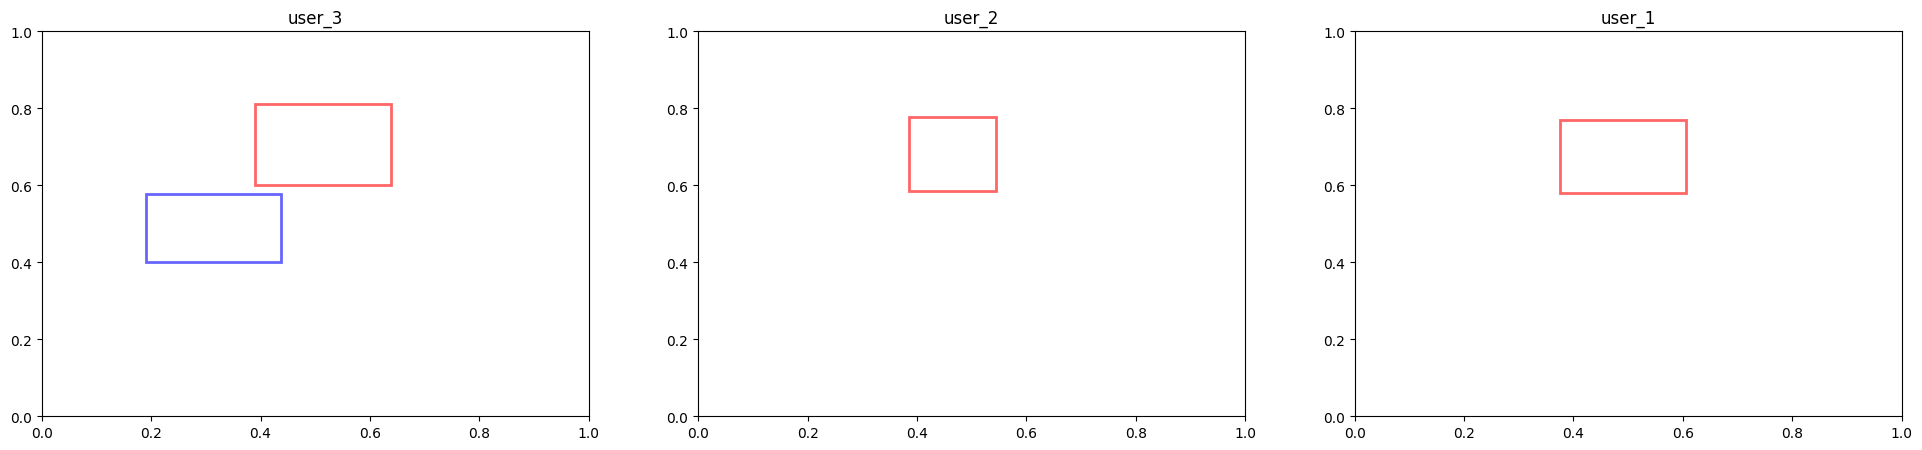

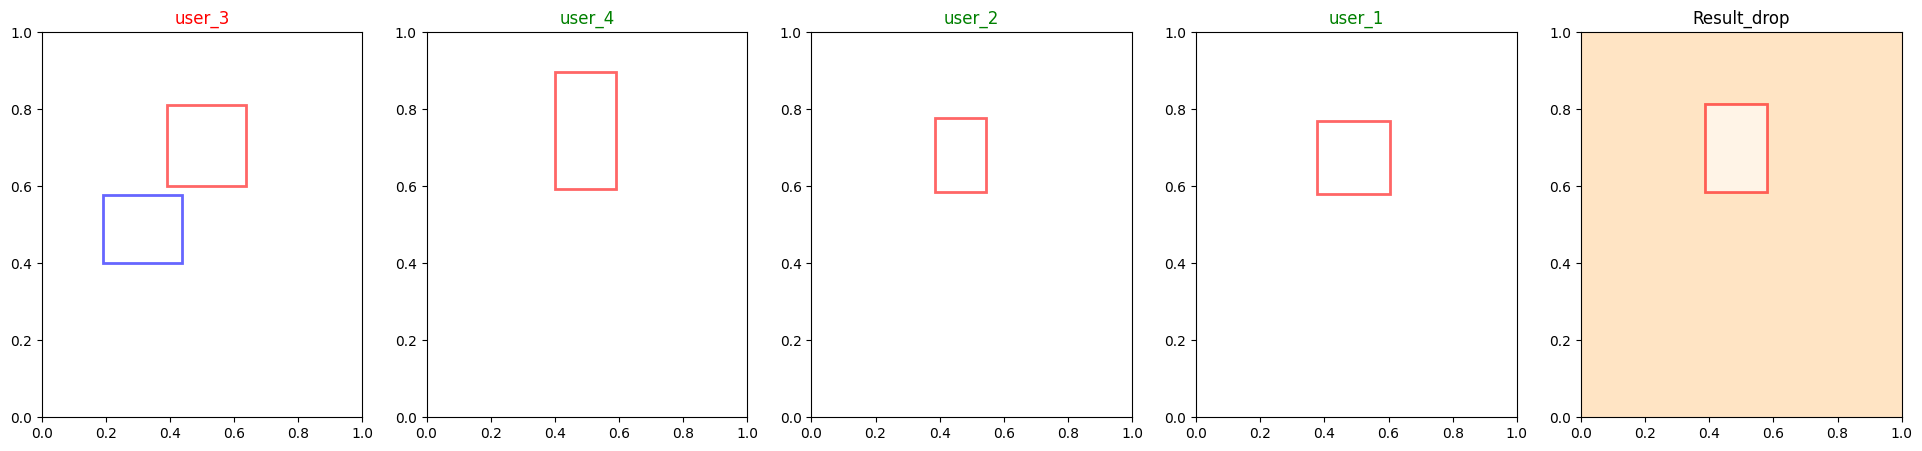

In [15]:
#  Example 2
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: BAD
#
#  We had 3 markups on image, but user_3 added box and the hard-method do not work.
#  We requested additional markup and hard-method worked after dropping one error markup.

method, group = aggregator.get_group_by_name(results, 'case_002_ov3_cl1_add_box')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_002_ov4_cl1_add_box')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

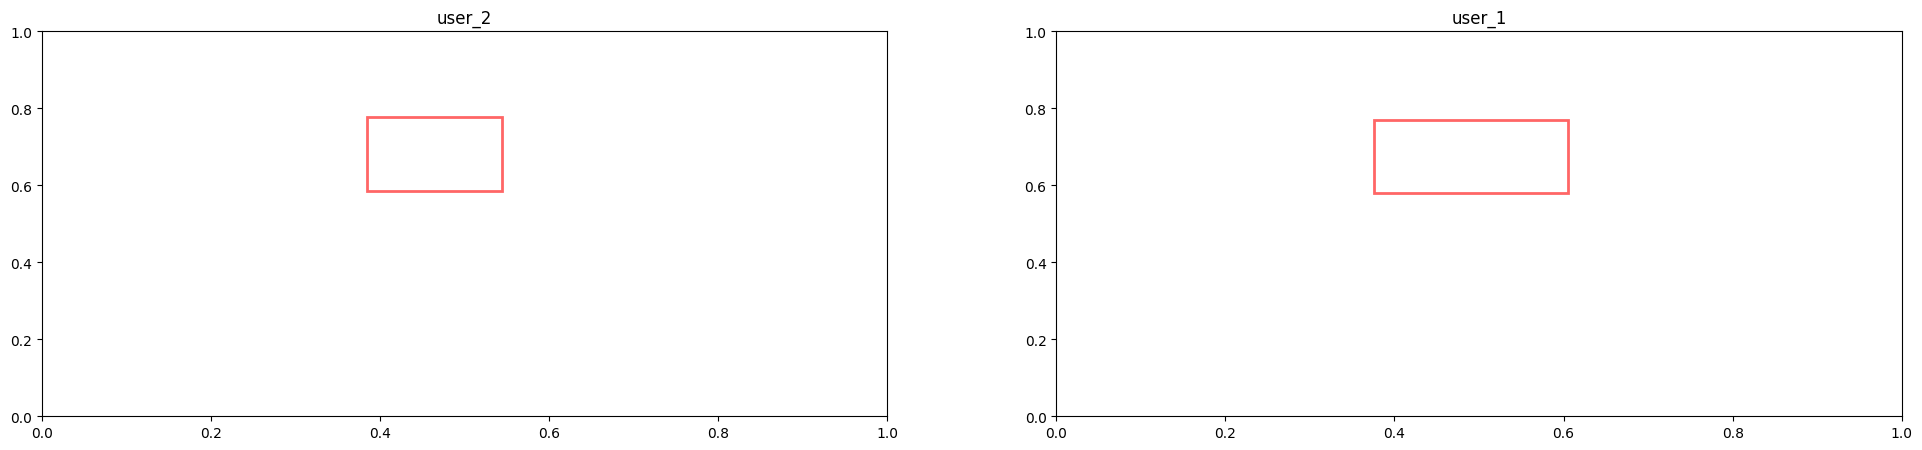

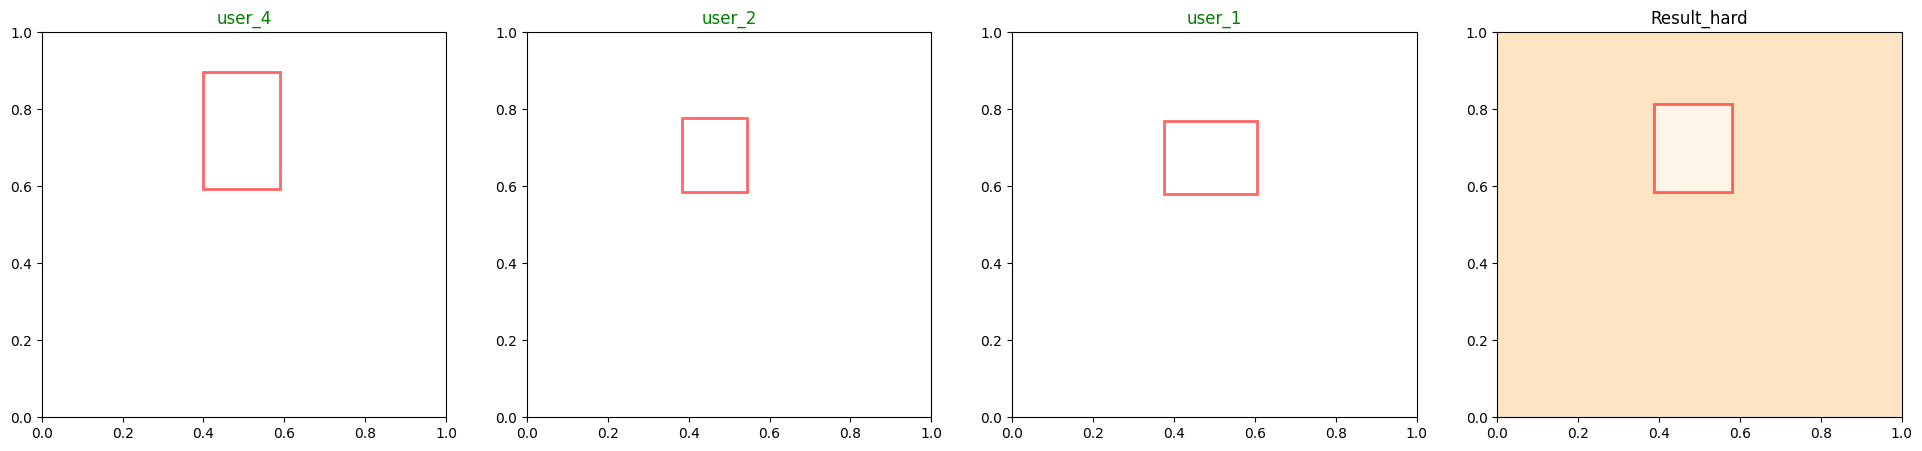

In [16]:
#  Example 3.1
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: BAD
#
#  We had 3 markups on image, but user_3 added empty markup and the hard-method do not work.
#  We requested additional markup and hard-method worked.

method, group = aggregator.get_group_by_name(results, 'case_003_ov3_cl1_rm_box')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_003_ov4_cl1_rm_box')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

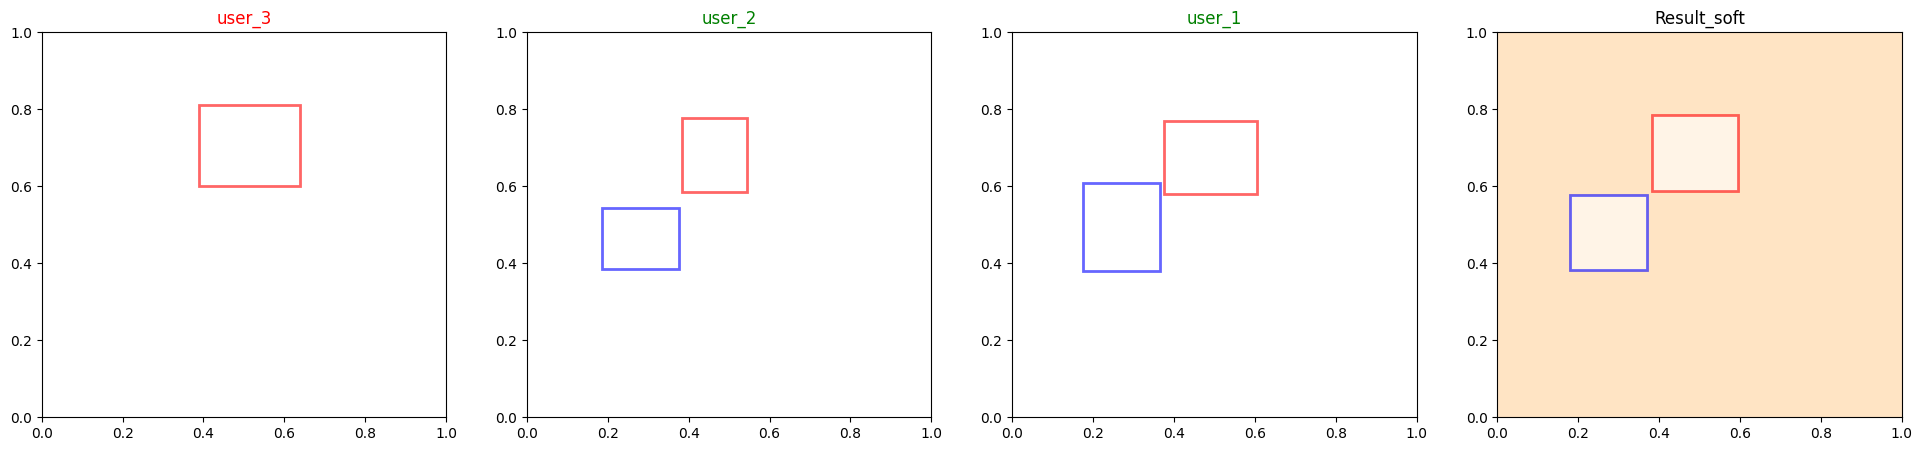

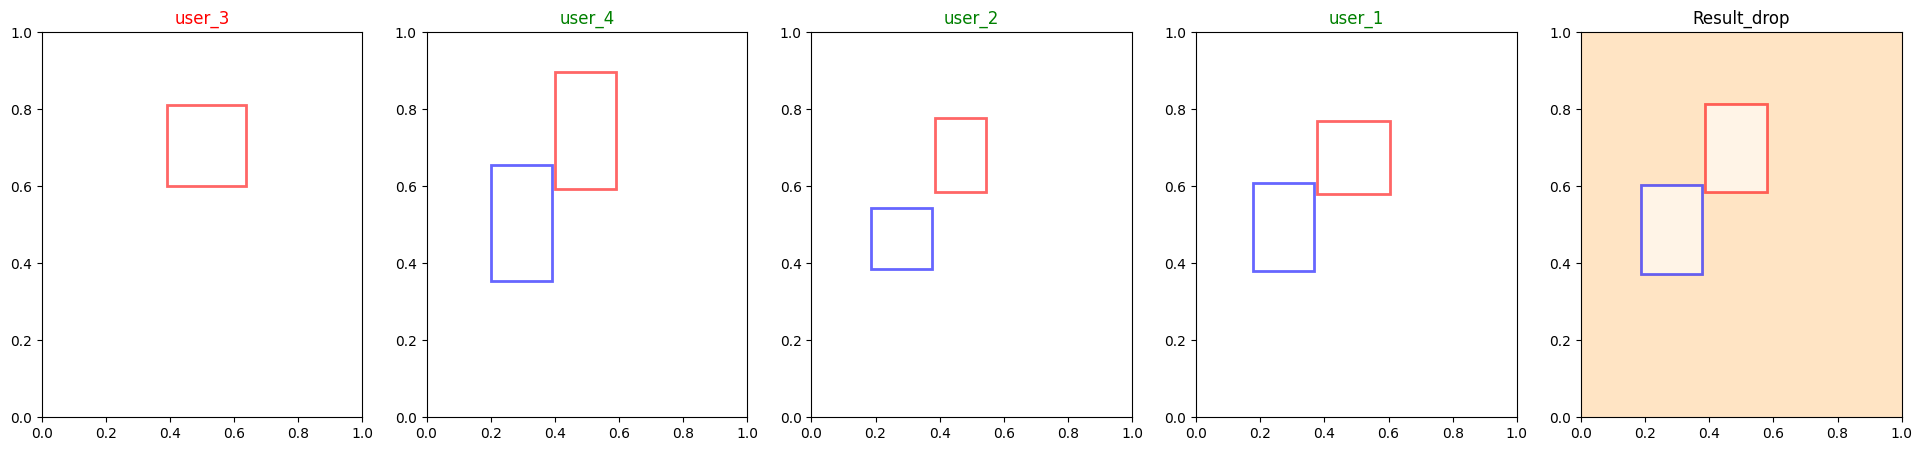

In [17]:
#  Example 3.2
#    Overlap: 3
#    Number of classes: 2
#    Method: SOFT
#    Result: GOOD
#
#  We had 3 markups on image, but user_3 did not add box and the hard-method do not work, but soft-method worked.
#  We requested additional markup and hard-method worked after dropping one error markup.

method, group = aggregator.get_group_by_name(results, 'case_003_ov3_cl2_rm_box')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_003_ov4_cl2_rm_box')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

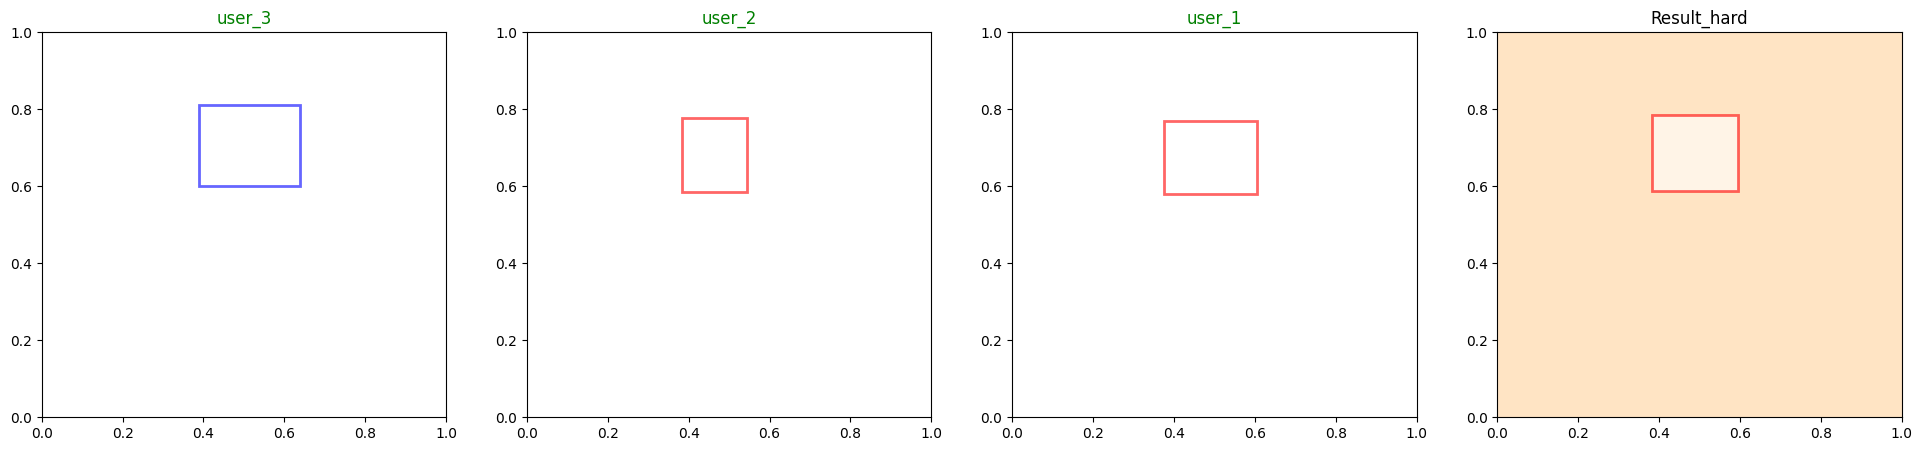

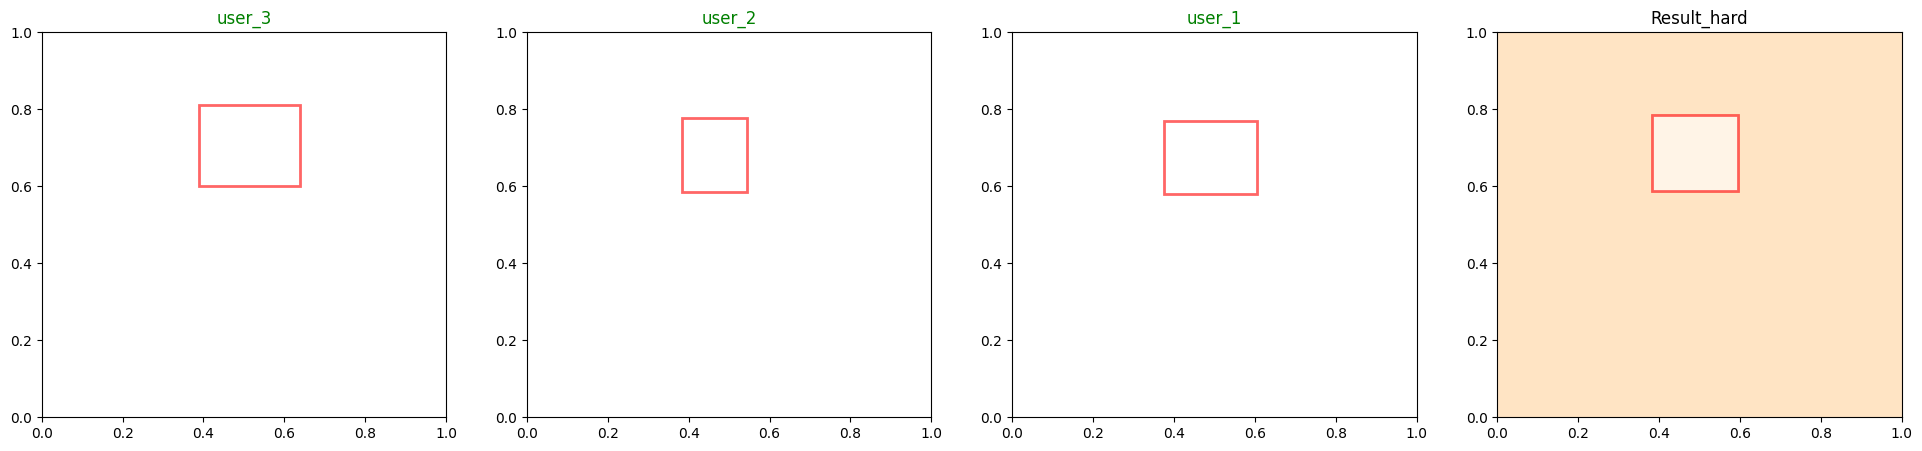

In [18]:
#  Example 4.1
#    Overlap: 3
#    Number of classes: 1
#    Method: HARD
#    Result: GOOD
#
#  We had 3 markups on image, but the user_3 mixed up the class.
#  Below is a comparison with the etalon, where the class is chosen correctly.

method, group = aggregator.get_group_by_name(results, 'case_004_ov3_cl1_mix')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_000_ov3_cl1')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

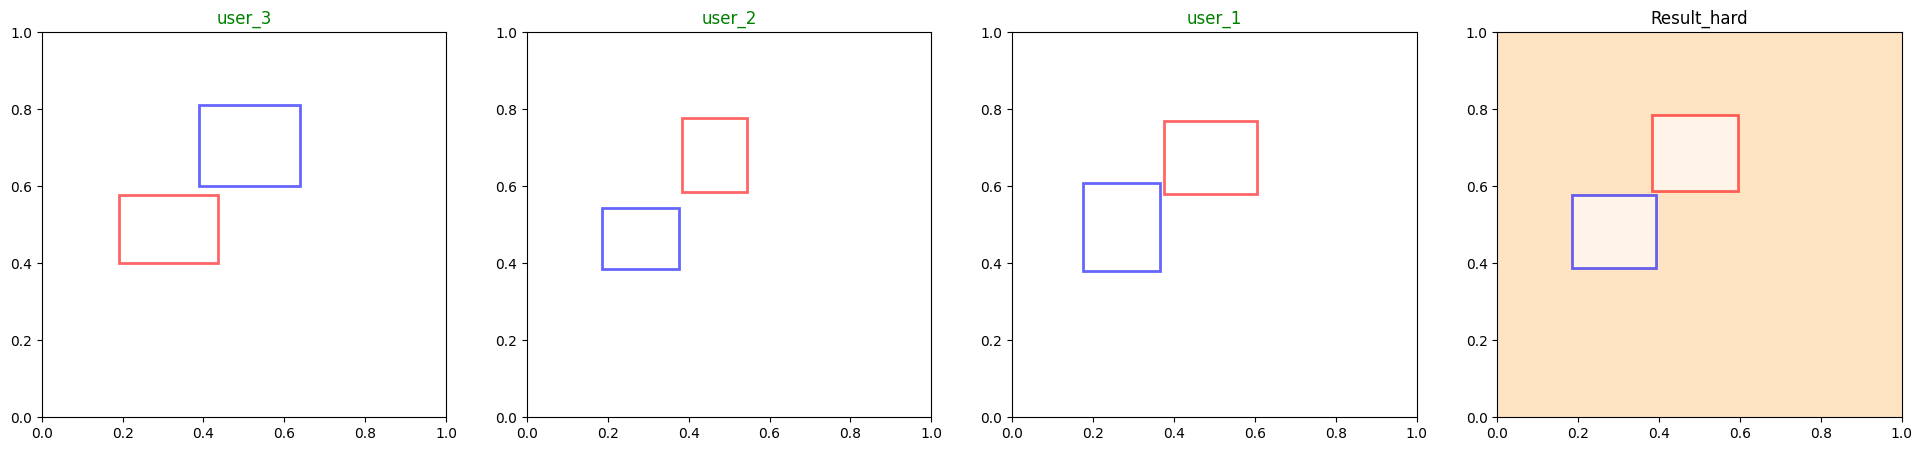

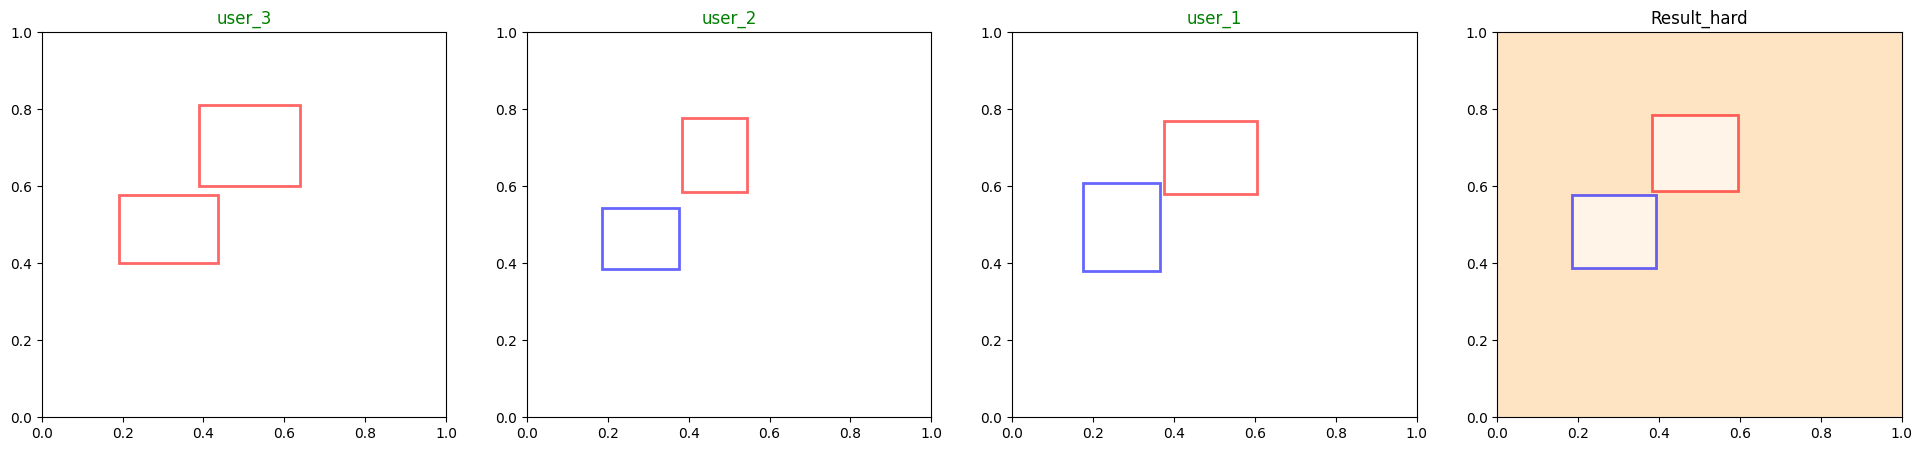

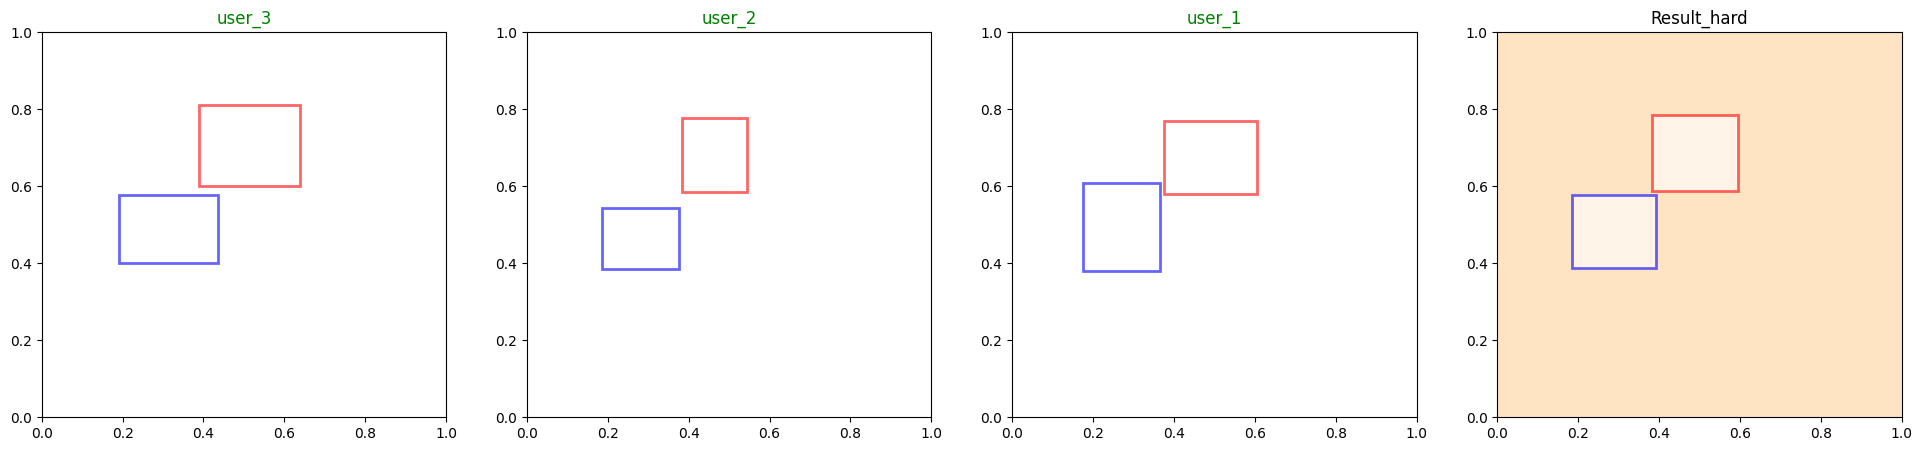

In [19]:
#  Example 4.2
#    Overlap: 3
#    Number of classes: 2
#    Method: HARD
#    Result: GOOD
#
#  We had 3 markups on image, but the user_3 mixed up the class.
#  Below is a comparison with the etalon, where the class is chosen correctly.

method, group = aggregator.get_group_by_name(results, 'case_004_ov3_cl2_mix')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_004_ov3_cl2_mix_2')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_000_ov3_cl2')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

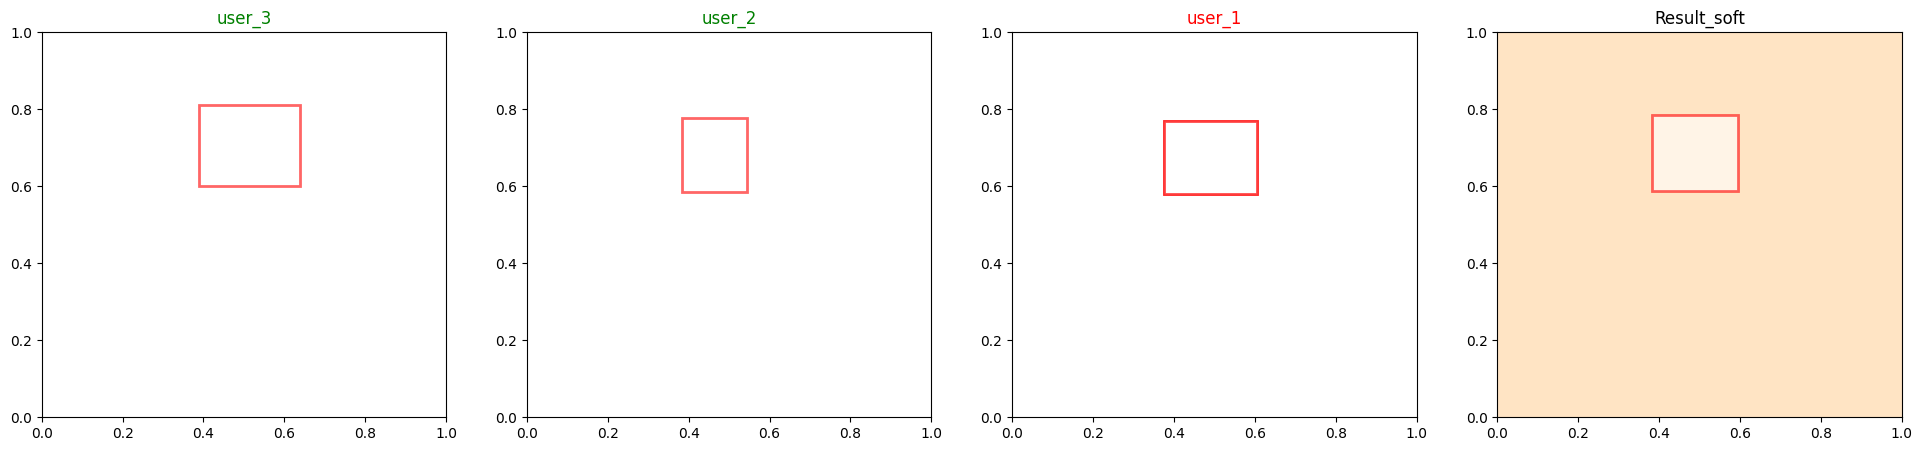

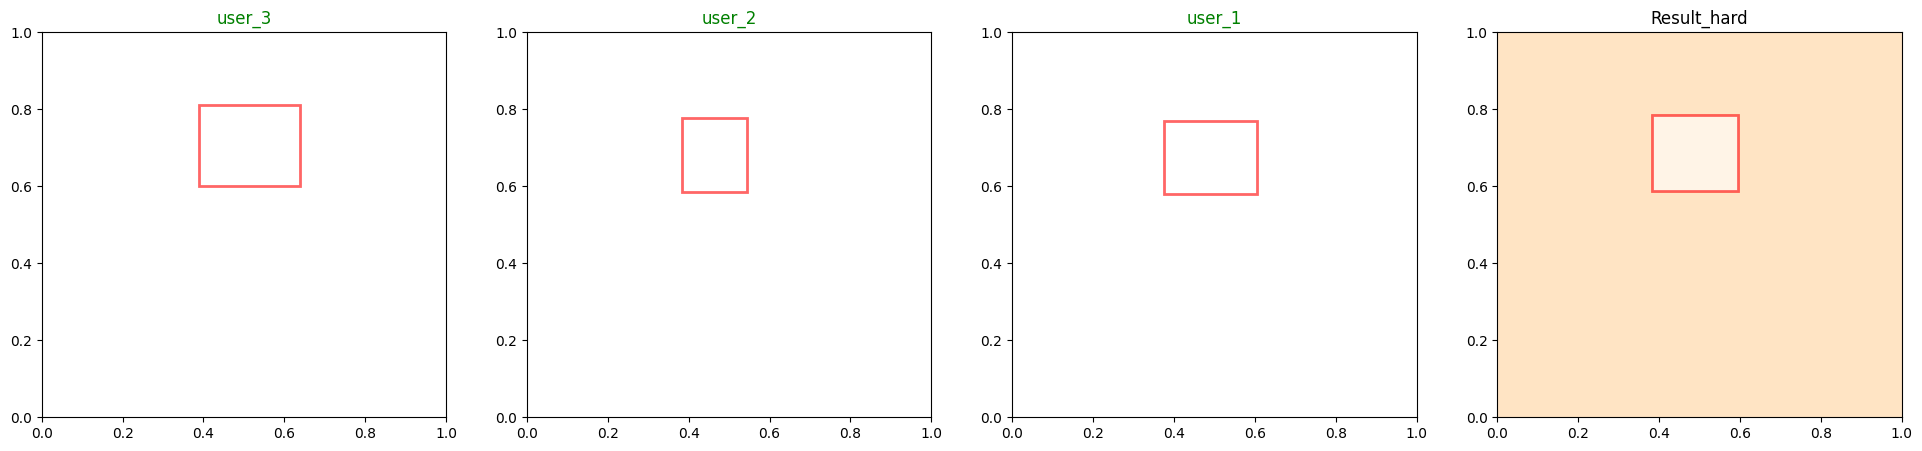

In [20]:
#  Example 5.1
#    Overlap: 3
#    Number of classes: 1
#    Method: SOFT
#    Result: GOOD
#
#  We had 3 markups on image, but the user_1 added duplicate boxes.
#  Below is a comparison with the etalon, where the class is chosen correctly.

method, group = aggregator.get_group_by_name(results, 'case_005_ov3_cl1_double')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_000_ov3_cl1')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

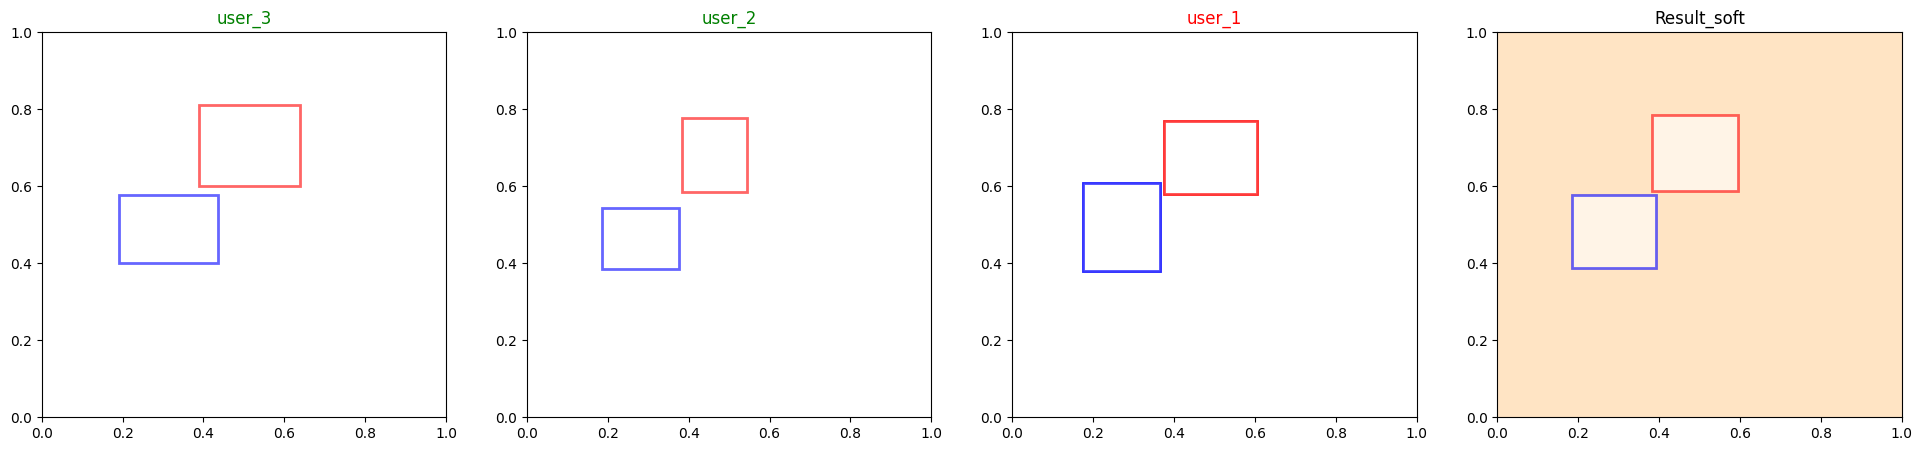

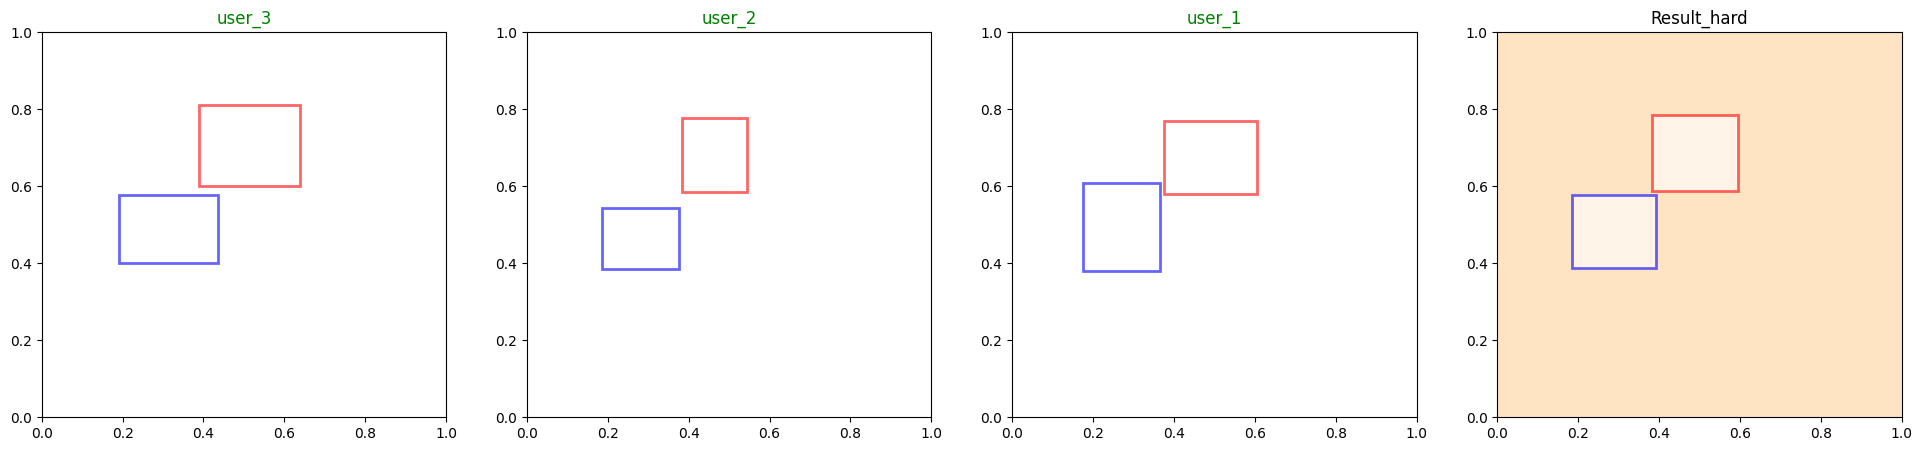

In [21]:
#  Example 5.2
#    Overlap: 3
#    Number of classes: 2
#    Method: SOFT
#    Result: GOOD
#
#  We had 3 markups on image, but the user_1 added duplicate boxes.
#  Below is a comparison with the etalon, where the class is chosen correctly.

method, group = aggregator.get_group_by_name(results, 'case_005_ov3_cl2_double')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_000_ov3_cl2')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

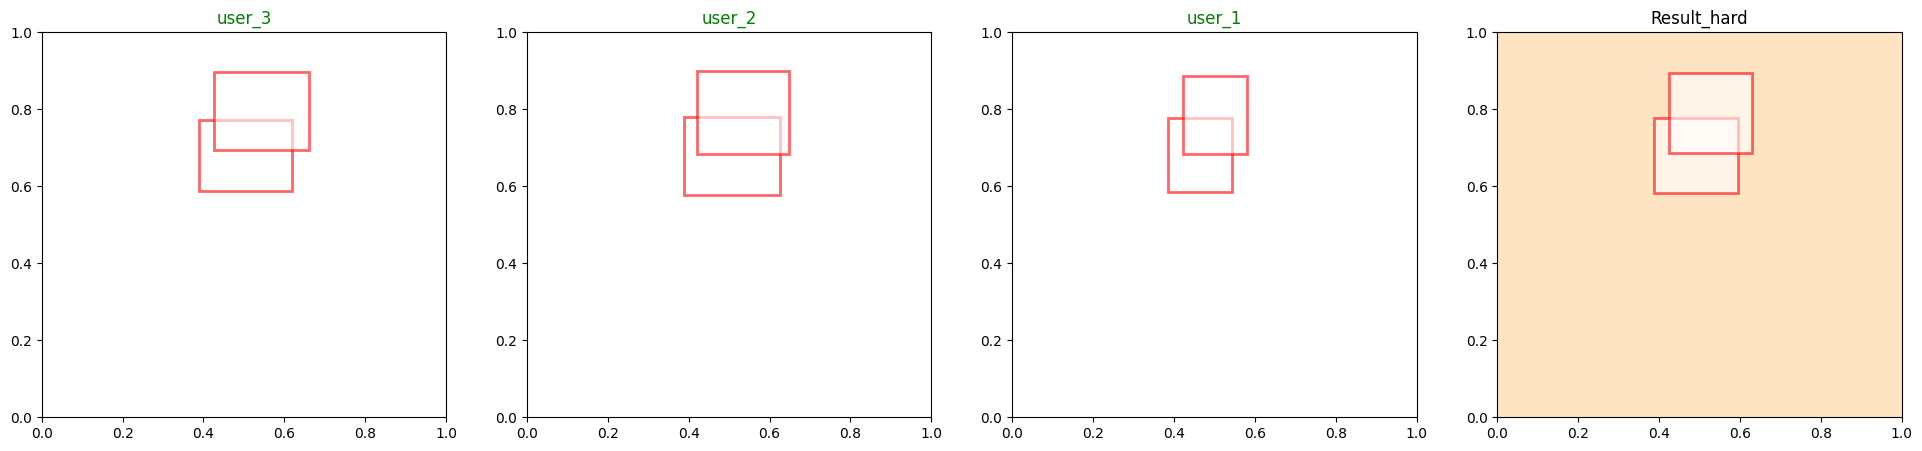

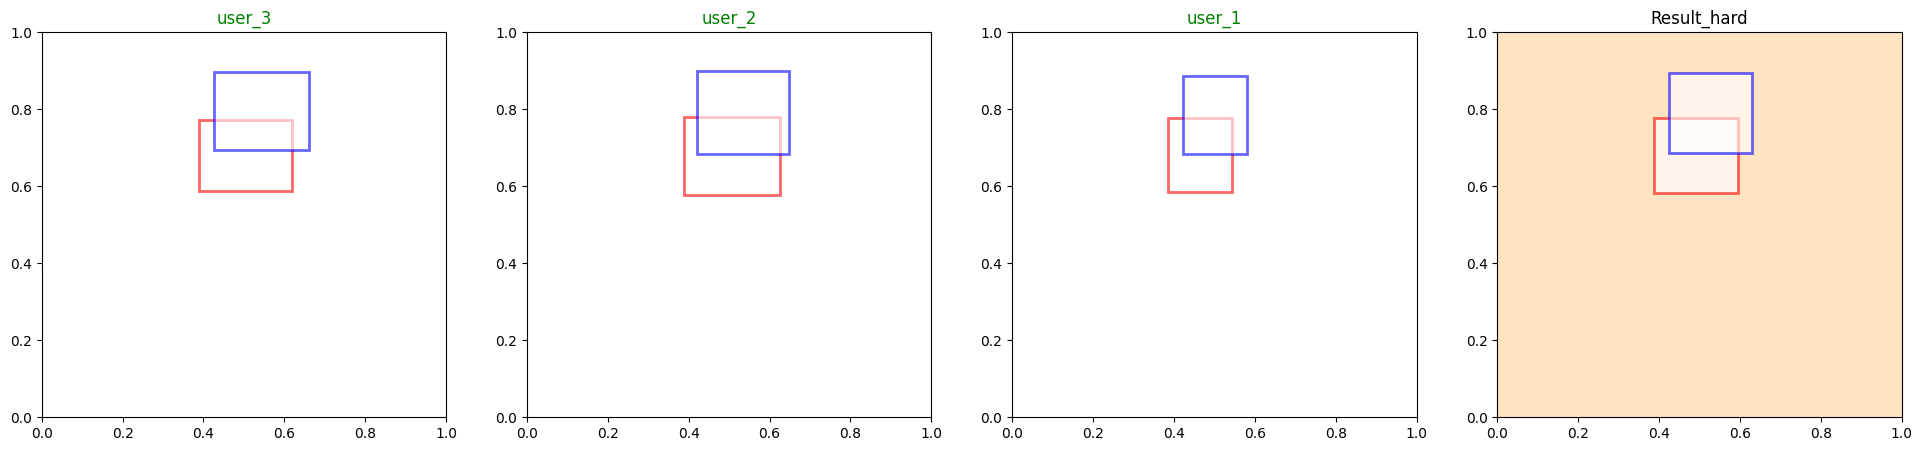

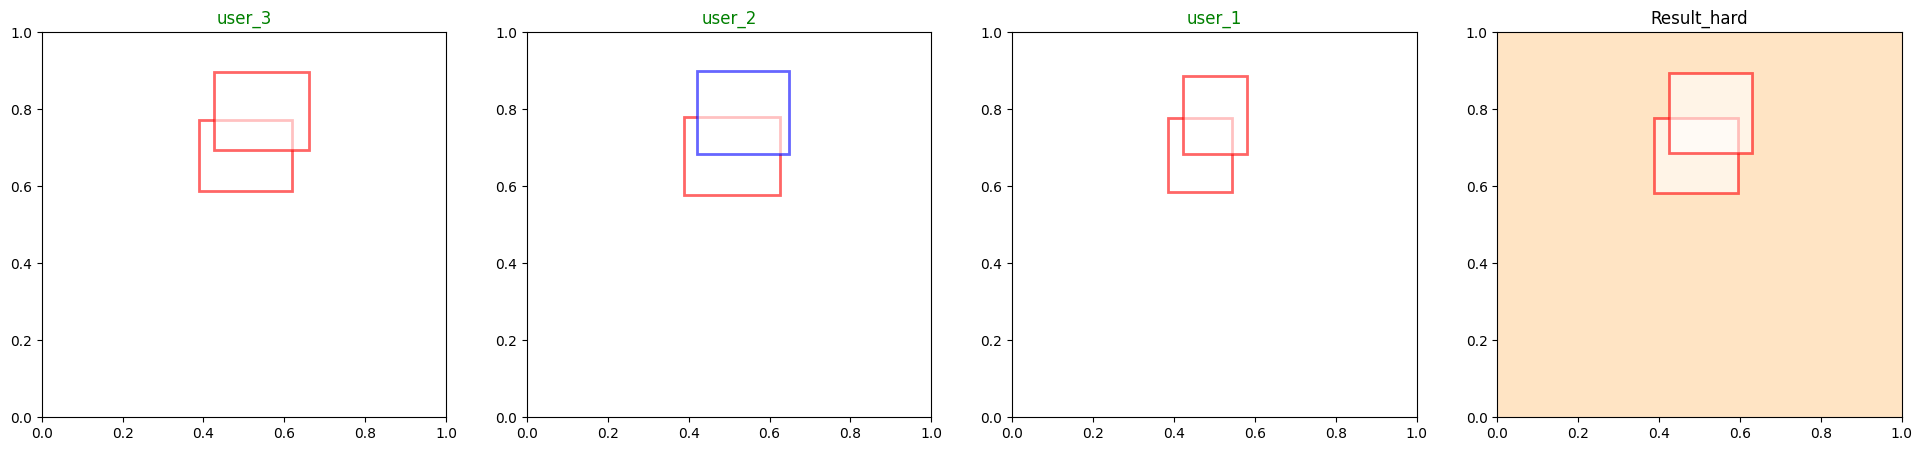

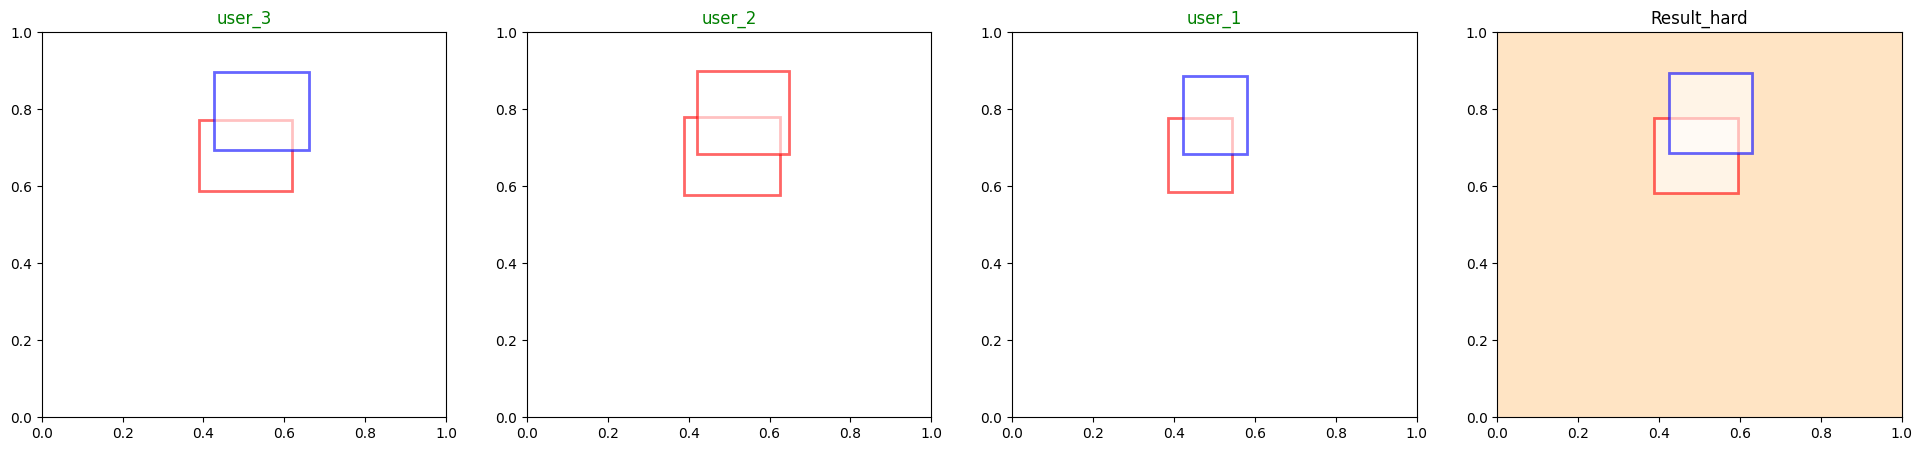

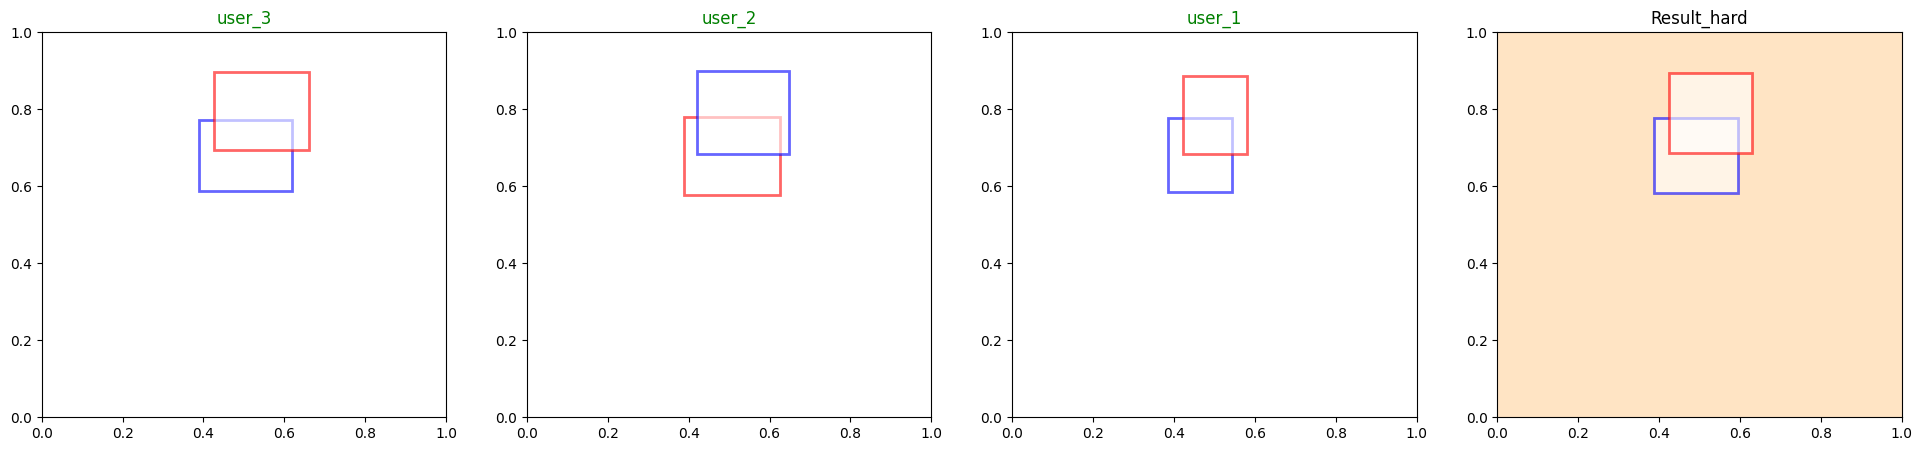

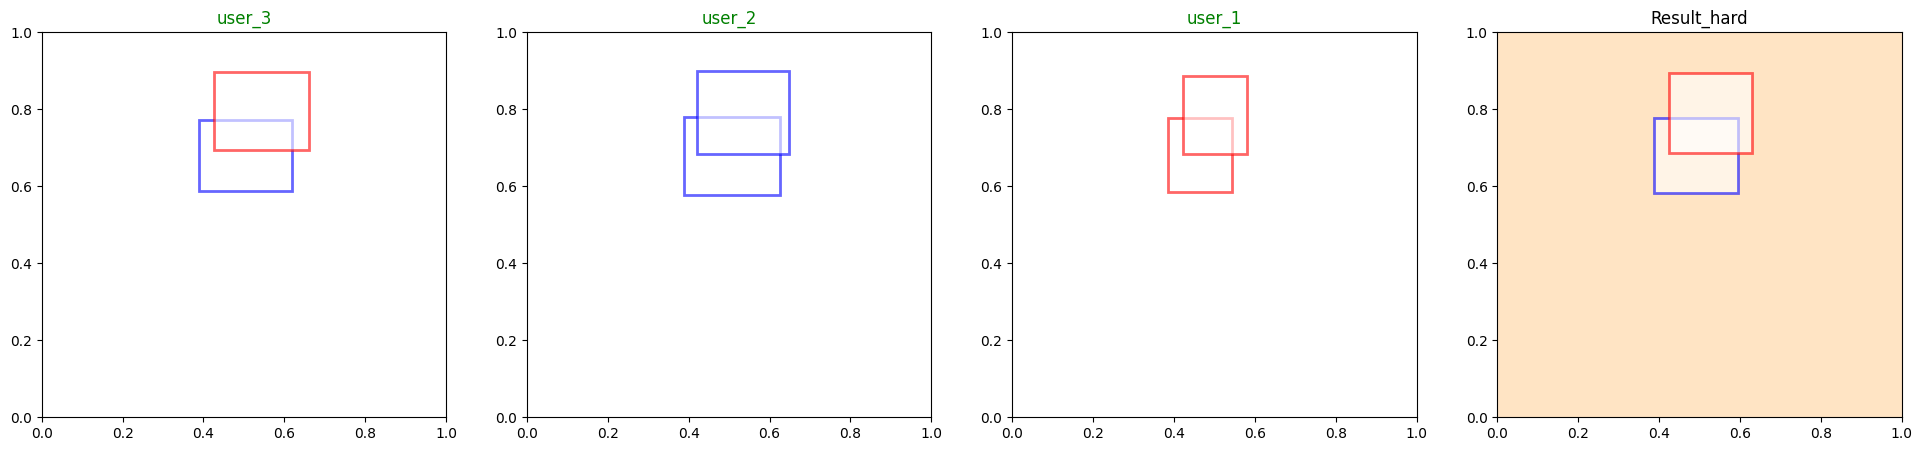

In [22]:
#  Example 6
#    Overlap: 3
#    Number of classes: 1-2
#    Method: HARD
#    Result: GOOD
#
#  We had 3 markups on image with overlay.

method, group = aggregator.get_group_by_name(results, 'case_006_ov3_cl1_overlay')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_006_ov3_cl2_overlay')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_006_ov3_cl2_overlay_1')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_006_ov3_cl2_overlay_2')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_006_ov3_cl2_overlay_3')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_006_ov3_cl2_overlay_4')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)

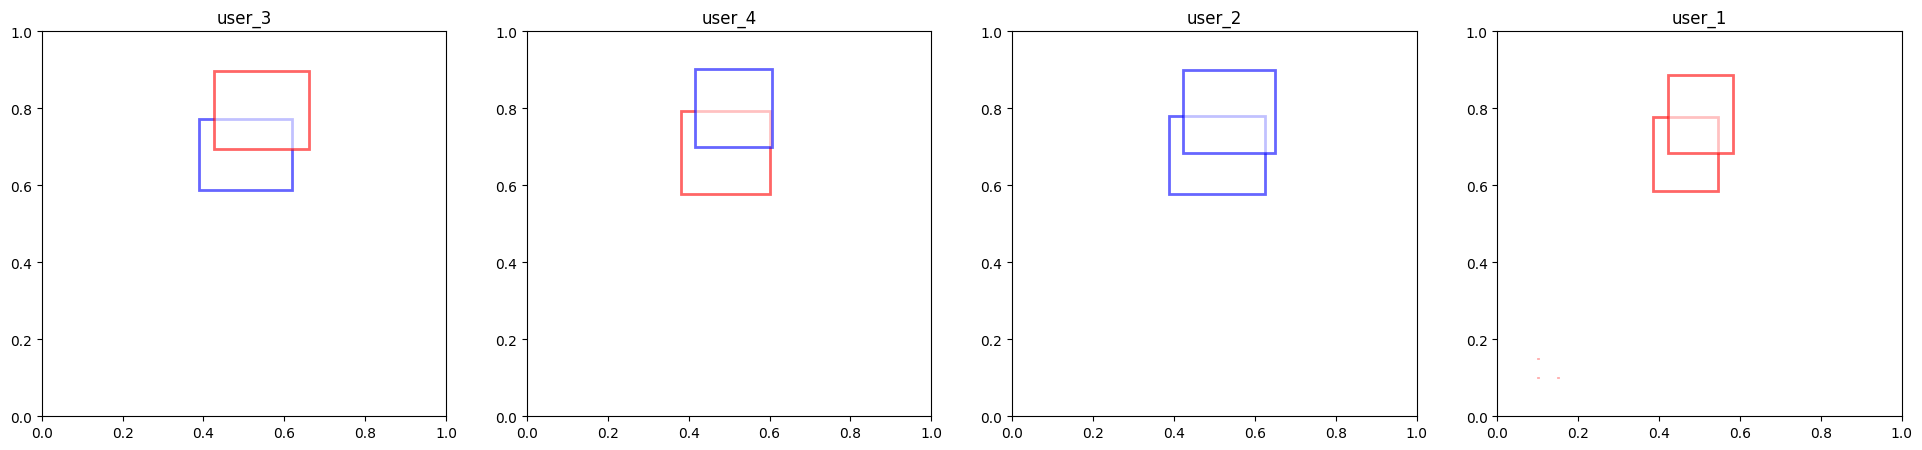

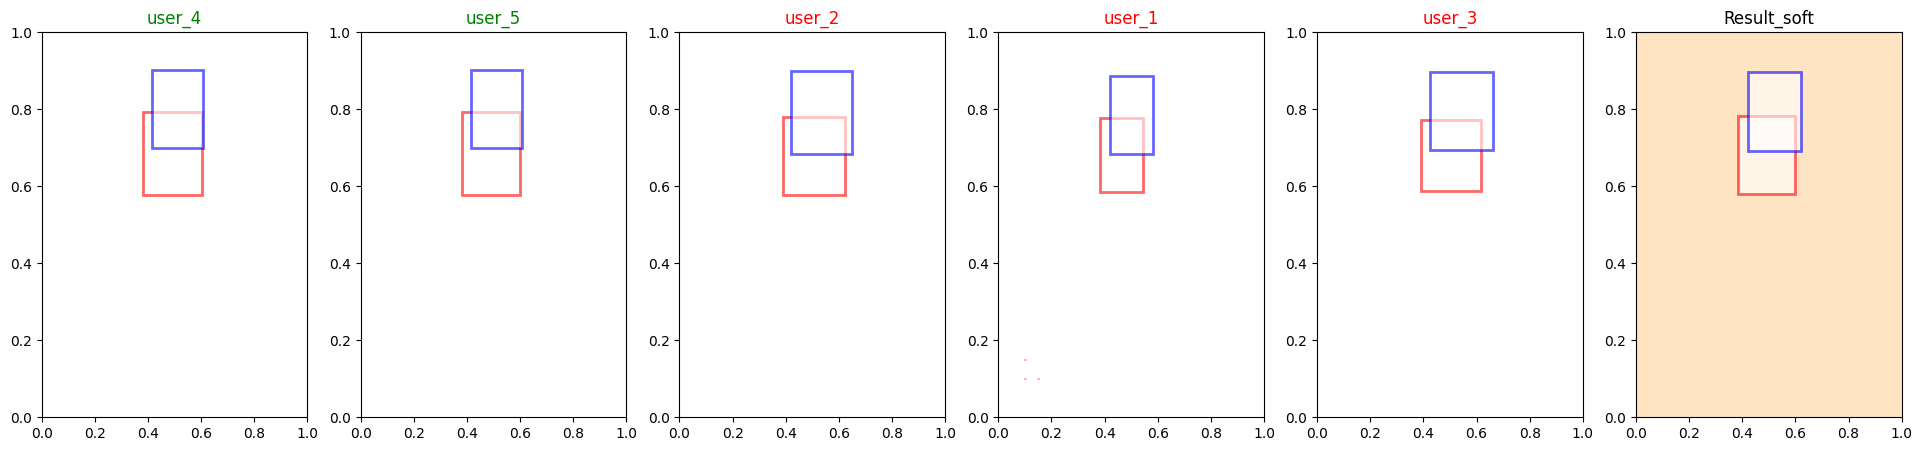

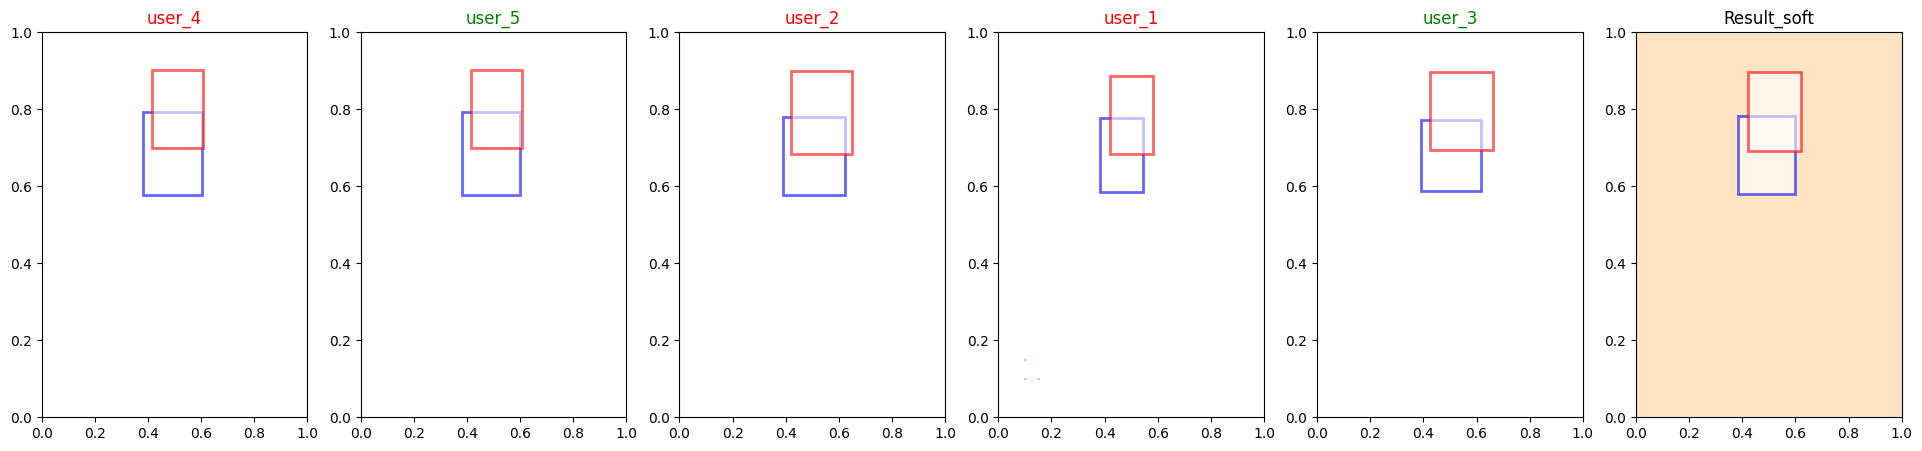

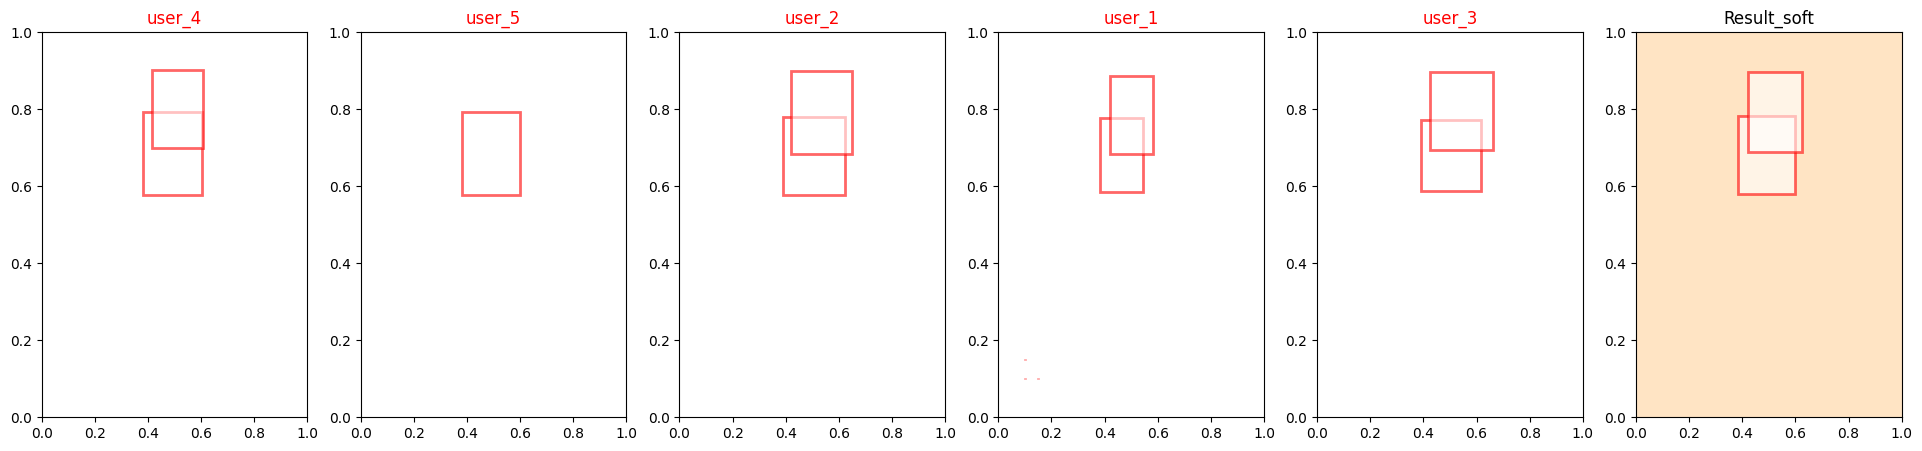

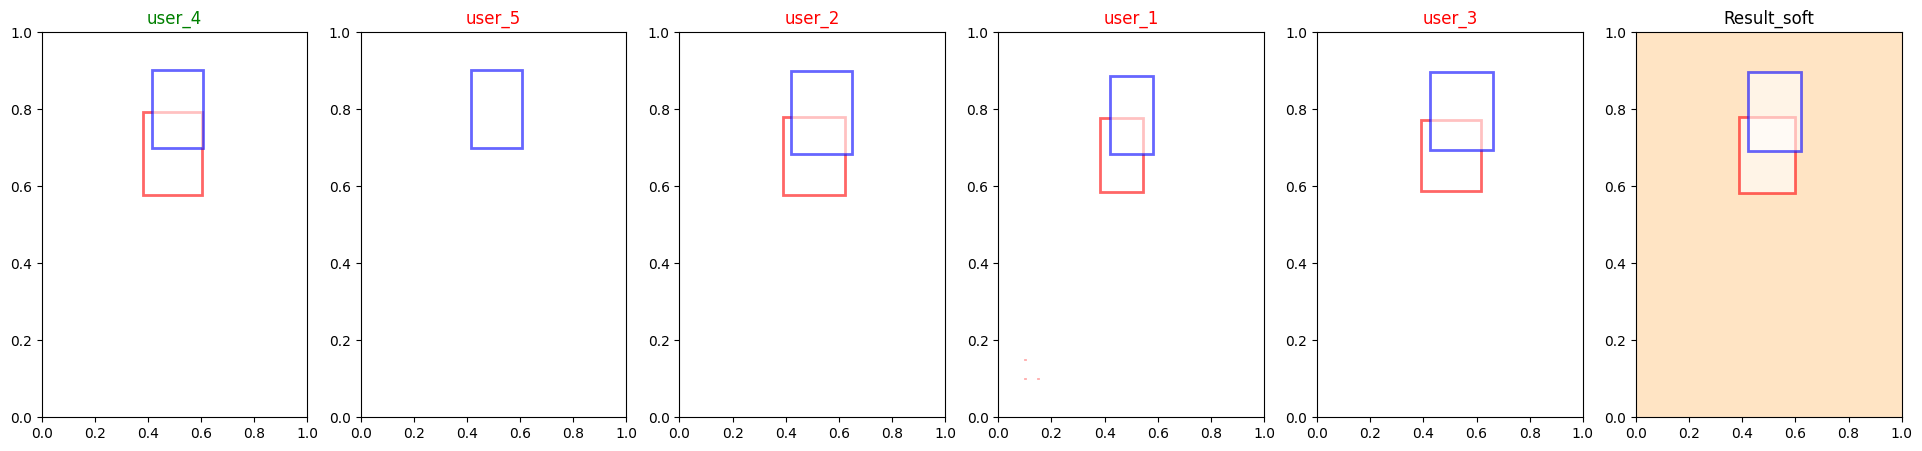

In [23]:
#  Example 7
#    Overlap: 4
#    Number of classes: 1-2
#    Method: SOFT
#    Result: BAD
#
#  We had 4 markups on image with overlay, but the soft-method do not work.
#  We requested additional different markups from user_5 and soft-method worked after manipulations. 

method, group = aggregator.get_group_by_name(results, 'case_007_ov4_cl2_overlay')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_007_ov5_cl2_overlay_1')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_007_ov5_cl2_overlay_2')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_007_ov5_cl2_overlay_3')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)
method, group = aggregator.get_group_by_name(results, 'case_007_ov5_cl2_overlay_4')
original_group, result_group, accepted, rejected = group
vis = Visualizer(original_group)
vis.draw(
    data = original_group,
    result = result_group,
    accepted = accepted,
    rejected = rejected
)